# MedVis 23 - Exercise Sheet 4 - Additional Material


---



# Preparation

Here the necessary libraries are included.

In [1]:
!pip install scipy
!pip install pydicom
!pip install seaborn

import seaborn as sns # for teh TF plot
from mpl_toolkits.axes_grid1 import make_axes_locatable # for teh TF plot
from matplotlib.cm import ScalarMappable # for teh TF plot
from matplotlib.colors import Normalize # for teh TF plot
import os # for file-handling
import numpy as np # maths
import matplotlib.pyplot as plt # plotting
from scipy import ndimage # image processing
from pydicom import dcmread # reading DICOM files

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.7 MB/s eta 0:00:00


Function for reading the MRI volume

In [2]:
# Read a volume and convert to numpy array
def read_dcm_volume(name):
    volume_img = []
    for file in sorted(os.listdir(name)):
        dcm_slice = dcmread(os.path.join(name, file))
        volume_img.append(dcm_slice.pixel_array)
    return np.transpose(np.array(volume_img),(1,2,0))

# Task 4: Transfer Function Example

To better understand what TFs are doing, we want to look at a practical example here of a window function. The calculation of the window function and the creation of the plots are done in the two code blocks below. Don't forget to run both of them after changing the code! Also, remember to upload a dataset (e.g. dataset1) and update the file path in the code before running it.

As you already know, window functions have two main parameters:
* Window Level (also called Window Center)
* Window Width (also called Window Range)

Change the values for window level and window width. Which one steers brightness and which one contrast?

Instead of just mapping to gray values, transfer functions can also map the intensity values of the original image to color. Try it out by choosing another colormap instead of `gray`. You can find a list of premade colormaps [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

In [4]:
# window function
def create_window(img, WL, WW):
    upper, lower = WL+WW/2, WL-WW/2
    X = np.clip(img.copy(), lower, upper)
    X = X - np.min(X)
    X = X / np.max(X)
    return X

# plot window function
def plot_window(x, level, width, heigth=1):
  leftBorder = level-width/2
  rightBorder = level+width/2

  y = ((x-leftBorder)/width) *heigth
  y[x<leftBorder] = 0
  y[x>rightBorder] = heigth
  print(rightBorder)
  return y


# load one slice
dcm_slice = dcmread("/opt/google/drive/dataset1/brain_001.dcm")
# convert it to numpy array for plotting the image
img = np.array(dcm_slice.pixel_array)
# normalize
img = img/np.max(img)


# window of the original image
x_original = np.arange(np.min(img), np.max(img), 0.01)
y_original = plot_window(x_original, np.max(img)/2, np.max(img))

######################################################################
# Change the window level and window width to find out which one
# steeres brightness and which one steeres contrast.
######################################################################
# user-steered window
window_level = 0.5
window_width = 0.5

#######################################################
# Use the transfer function to map the intensity
# values to color by changing the color map.
# These are possible color maps:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
#######################################################
colormap = 'gray'

windowed_img = create_window(img, window_level, window_width)

x = np.arange(np.min(img), np.max(img), 0.01)
ylin = plot_window(x, window_level, window_width)

1.0
0.75


<ipython-input-5-721b8110f270>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(img.flatten(), ax=ax2);
<ipython-input-5-721b8110f270>:53: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(windowed_img.flatten(), ax=ax5)


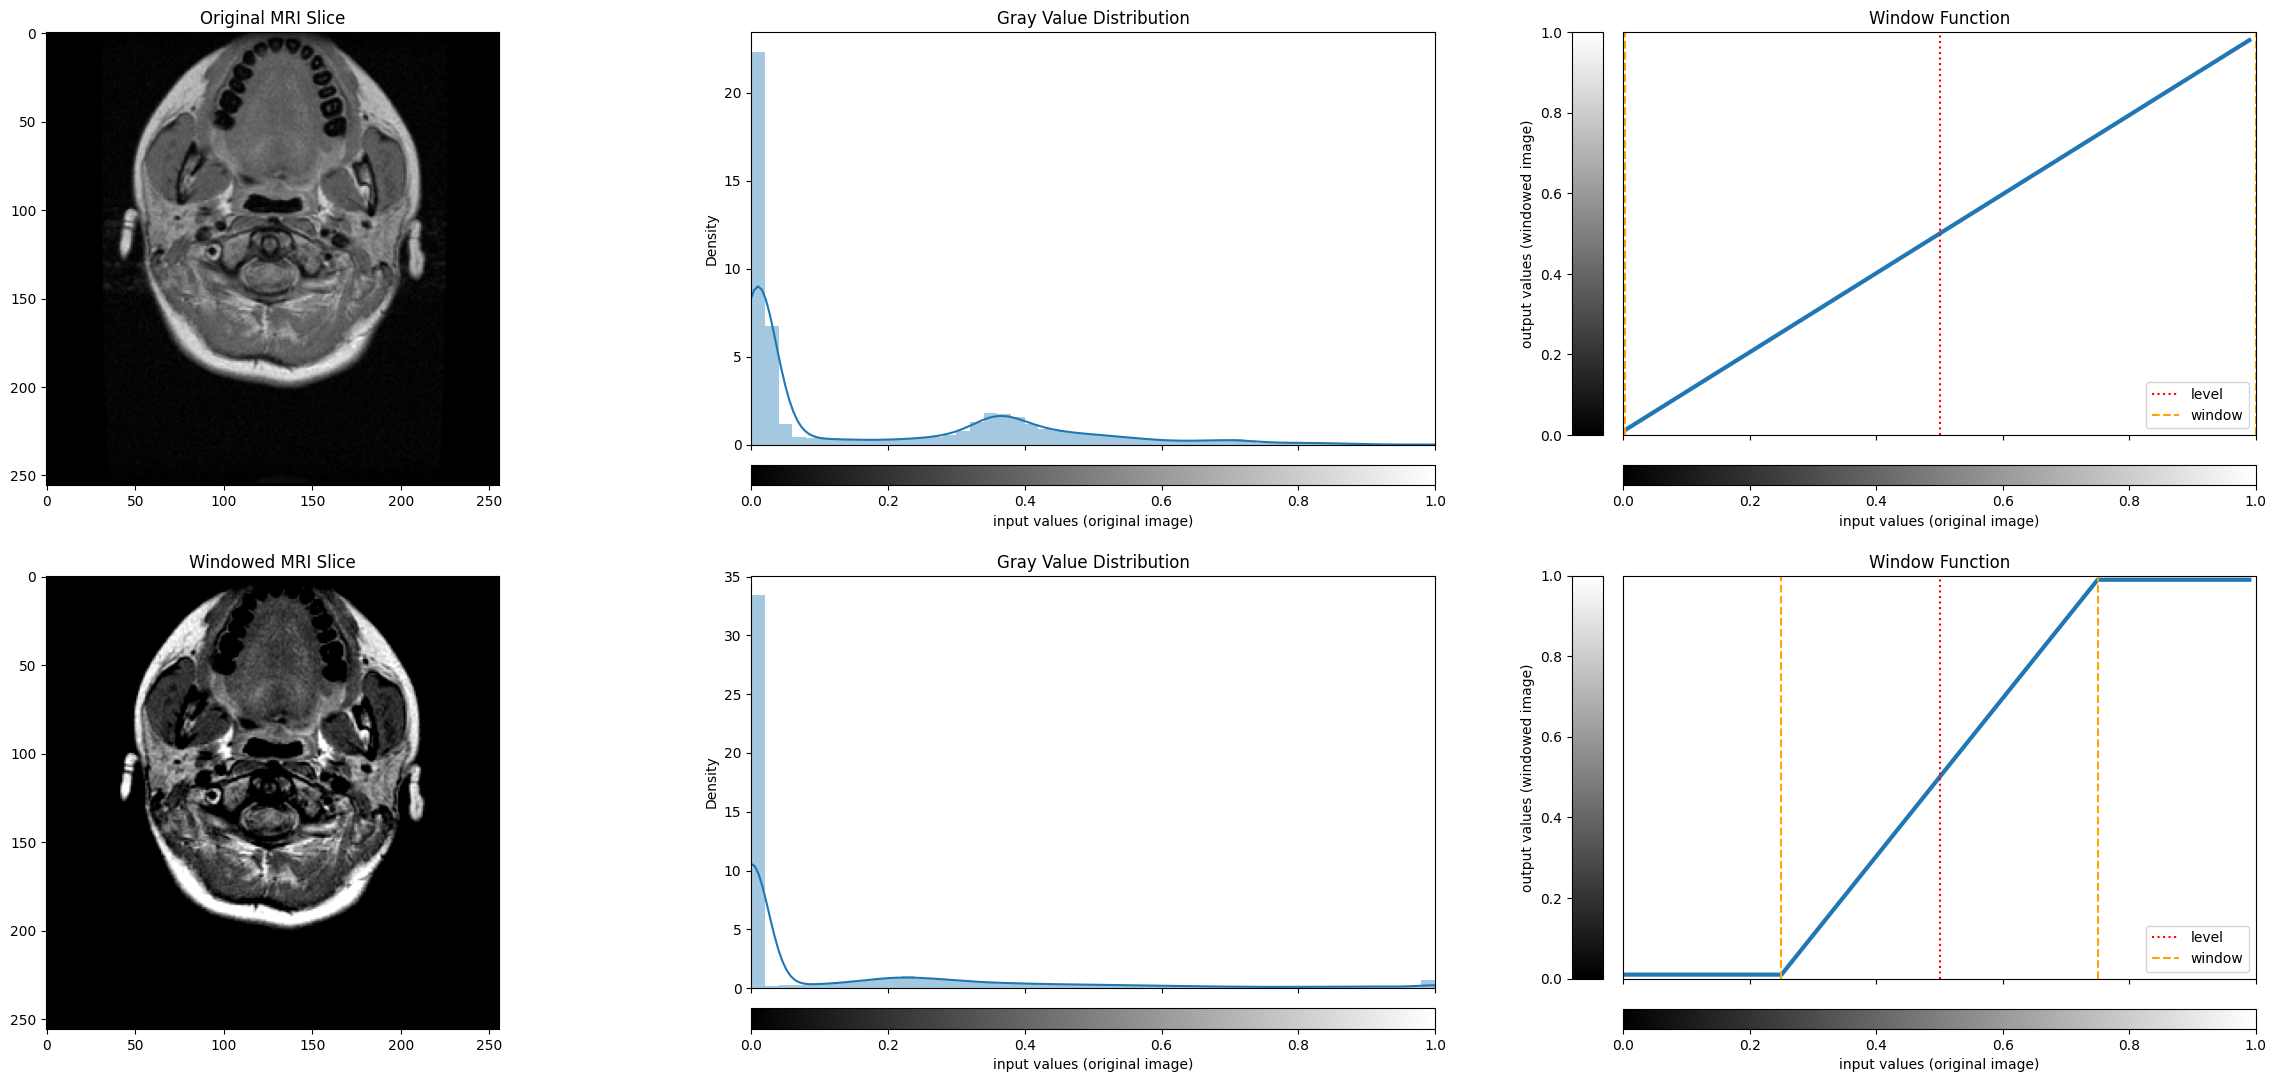

In [5]:
#@title Run this cell to create the plots

# Create a figure (window)
fig = plt.figure(figsize=(30,20))

ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title('Original MRI Slice')
ax1.imshow(img, cmap='gray')

ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Gray Value Distribution')
sns.distplot(img.flatten(), ax=ax2);
ax2.set_xlim((np.min(img),np.max(img)))
# plot bottom colorbar
div = make_axes_locatable(ax2)
cax = div.append_axes("bottom", size="5%", pad=0.2)
clb2 = plt.colorbar(ScalarMappable(Normalize(0,1), cmap=plt.get_cmap("gray")), cax=cax, use_gridspec=True, orientation="horizontal")
clb2.set_label('input values (original image)')
cax.yaxis.set_ticks_position('right')
cax.yaxis.set_label_position('right')
plt.setp(ax2.get_xticklabels(), visible=False)

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(x_original,y_original, linewidth=3)
plt.yticks([])
#plt.xticks([])
ax3.set_title('Window Function')
ax3.set_ylim((-0.01,1.01))
# plot left colorbar
div = make_axes_locatable(ax3)
cax = div.append_axes("left", size="5%", pad=0.2)
clb2 = plt.colorbar(ScalarMappable(Normalize(0,1), cmap=plt.get_cmap("gray")), cax=cax, use_gridspec=True)
clb2.set_label('output values (windowed image)')
cax.yaxis.set_ticks_position('left')
cax.yaxis.set_label_position('left')
# plot bottom colorbar
cax = div.append_axes("bottom", size="5%", pad=0.3, sharex=ax3)
clb = fig.colorbar(ScalarMappable(Normalize(0,np.max(img)), cmap=plt.get_cmap("gray")), cax=cax , orientation="horizontal")
clb.set_label('input values (original image)')
plt.setp(ax3.get_xticklabels(), visible=False)
# plot vertical lines and legend
ax3.axvline(x=np.max(img)/2, color='red', linestyle=':', label="level")
ax3.axvline(x=np.min(img)+0.003, color='orange', linestyle='--', label="window")
ax3.axvline(x=np.max(img), color='orange', linestyle='--')
ax3.legend(loc="lower right")

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Windowed MRI Slice')
ax4.imshow(windowed_img, cmap=colormap)

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Gray Value Distribution')
sns.distplot(windowed_img.flatten(), ax=ax5)
ax5.set_xlim((0,1))
# plot bottom colorbar
div = make_axes_locatable(ax5)
cax = div.append_axes("bottom", size="5%", pad=0.2)
clb2 = plt.colorbar(ScalarMappable(Normalize(0,1), cmap=plt.get_cmap(colormap)), cax=cax, use_gridspec=True, orientation="horizontal")
clb2.set_label('input values (original image)')
cax.yaxis.set_ticks_position('right')
cax.yaxis.set_label_position('right')
plt.setp(ax5.get_xticklabels(), visible=False)

ax6 = fig.add_subplot(3, 3, 6)
ax6.plot(x,ylin, linewidth=3)
ax6.set_title('Window Function')
ax6.set_ylim((-0.01,1.01))
ax6.set_yticks([])
#ax6.set_xticks([])
# plot left colorbar
div = make_axes_locatable(ax6)
cax = div.append_axes("left", size="5%", pad=0.2)
clb2 = plt.colorbar(ScalarMappable(Normalize(0,1), cmap=plt.get_cmap(colormap)), cax=cax, use_gridspec=True)
clb2.set_label('output values (windowed image)')
cax.yaxis.set_ticks_position('left')
cax.yaxis.set_label_position('left')
# plot bottom colorbar
cax = div.append_axes("bottom", size="5%", pad=0.3, sharex=ax6)
clb = fig.colorbar(ScalarMappable(Normalize(0,np.max(img)), cmap=plt.get_cmap("gray")), cax=cax , orientation="horizontal")
clb.set_label('input values (original image)')
plt.setp(ax6.get_xticklabels(), visible=False)
# plot vertical lines and legend
ax6.axvline(x=window_level, color='red', linestyle=':', label="level")
ax6.axvline(x=window_level-window_width/2, color='orange', linestyle='--', label="window")
ax6.axvline(x=window_level+window_width/2, color='orange', linestyle='--')
ax6.legend(loc="lower right")

# Task 5

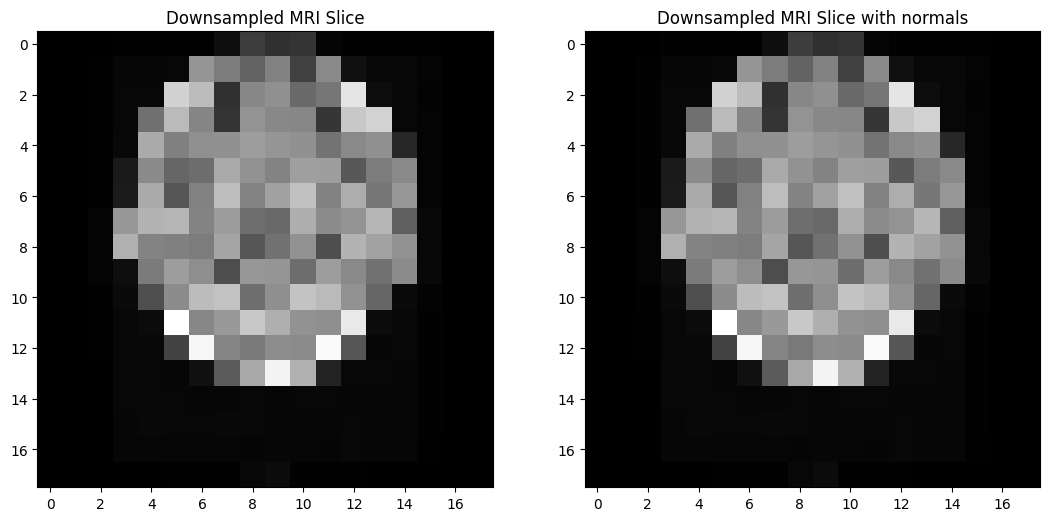

In [7]:
dcm_slice = dcmread("/opt/google/drive/dataset1/brain_001.dcm")
sampling_freq = 15

img = np.array(dcm_slice.pixel_array)
smoothed_img = ndimage.gaussian_filter(img, sigma=3)
downsampled_img = smoothed_img[::sampling_freq,::sampling_freq]


#################################################
# Calculate the normals of the down-samled image
#################################################


# Create a figure (window)
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('Downsampled MRI Slice')
ax1.imshow(downsampled_img, cmap='gray')

ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title('Downsampled MRI Slice with normals')
ax2.imshow(downsampled_img, cmap='gray')
# add normals to the plot here, e.g. by using plt.quiver()

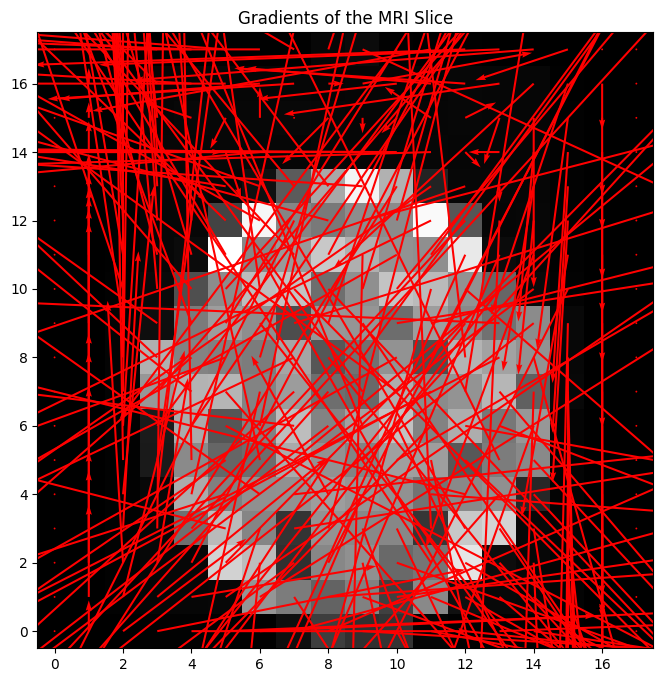

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Simplified image from the Google Colab Notebook
# Use the downsampled_img as the input image
img = downsampled_img

# Compute gradients using np.gradient
gradient_x, gradient_y = np.gradient(img)

# Create a meshgrid for quiver plot
x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))

# Plot the image
plt.figure(figsize=(10, 8))
plt.imshow(img, cmap='gray', origin='lower')

# Plot quiver plot for gradients
plt.quiver(x, y, gradient_x, gradient_y, color='r', scale=20)

plt.title('Gradients of the MRI Slice')
plt.show()
